# Calculating Stochastic Optimals, Dynamics-weighted Principal Component time series and Empirical—Dynamical functions

This notebook combines forcing anomaly data matrices calculated in `1_`...`.ipynb` with adjoint output resulting from the adjoint runs set up in `2_`...`.ipynb` to calculate DPCs and EDFs. It is assumed that the raw model adjoint output has been converted to netCDF format using the script `ADJ_to_netcdf.py`, and each different adjoint run (for the four latitudes 25N-55N) is located in a directory named, e.g., `/wherever/your/adjoint/output/is/MVT55/` (change accordingly)

In [6]:
from DPC_functions import * 

# Load adjoint output

In [8]:
#  Open each adjoint file, reduce the spatial dimensionality to that of the data matrix (concatenating wind stress directions), reverse the lag-time order:

adjoint_output_location='/parent/directory/to/your/ECCO/adjoint/runs/'
adjoint_output_location='/glade/work/dafydd/PLEIADES_OUTPUT/'

MVT55_hflux_ad=xr.open_dataset(adjoint_output_location+'MVT55/ADJqnet.nc',decode_times=False).ADJqnet.values.reshape(-1,13*90*90)[::-1,Ti]
# MVT45_hflux_ad=xr.open_dataset(adjoint_output_location+'MVT45/ADJqnet.nc',decode_times=False).ADJqnet.values.reshape(-1,13*90*90)[::-1,Ti]
# MVT35_hflux_ad=xr.open_dataset(adjoint_output_location+'MVT35/ADJqnet.nc',decode_times=False).ADJqnet.values.reshape(-1,13*90*90)[::-1,Ti]
MVT25_hflux_ad=xr.open_dataset(adjoint_output_location+'MVT25/ADJqnet.nc',decode_times=False).ADJqnet.values.reshape(-1,13*90*90)[::-1,Ti]

MVT25_tauxy_ad=np.hstack([\
        xr.open_dataset(adjoint_output_location+'MVT25_10y/ADJtaux.nc',decode_times=False).ADJtaux.values.reshape(-1,13*90*90)[::-1,Ui],\
        xr.open_dataset(adjoint_output_location+'MVT25_10y/ADJtauy.nc',decode_times=False).ADJtauy.values.reshape(-1,13*90*90)[::-1,Vi]])
# MVT35_tauxy_ad=np.hstack([\
#         xr.open_dataset(adjoint_output_location+'MVT35_10y/ADJtaux.nc',decode_times=False).ADJtaux.values.reshape(-1,13*90*90)[::-1,Ui],\
#         xr.open_dataset(adjoint_output_location+'MVT35_10y/ADJtauy.nc',decode_times=False).ADJtauy.values.reshape(-1,13*90*90)[::-1,Vi]])
# MVT45_tauxy_ad=np.hstack([\
#         xr.open_dataset(adjoint_output_location+'MVT45_10y/ADJtaux.nc',decode_times=False).ADJtaux.values.reshape(-1,13*90*90)[::-1,Ui],\
#         xr.open_dataset(adjoint_output_location+'MVT45_10y/ADJtauy.nc',decode_times=False).ADJtauy.values.reshape(-1,13*90*90)[::-1,Vi]])
MVT55_tauxy_ad=np.hstack([\
        xr.open_dataset(adjoint_output_location+'MVT55_10y/ADJtaux.nc',decode_times=False).ADJtaux.values.reshape(-1,13*90*90)[::-1,Ui],\
        xr.open_dataset(adjoint_output_location+'MVT55_10y/ADJtauy.nc',decode_times=False).ADJtauy.values.reshape(-1,13*90*90)[::-1,Vi]])


# Calculate Stochastic Optimals


In [10]:
SO55_hflux,_,_=la.svds(MVT55_hflux_ad.T,k=1)
np.save(adjoint_output_location+'SO55_hflux.npy',SO55_hflux)

SO55_tauxy,_,_=la.svds(MVT55_tauxy_ad.T,k=1)
np.save(adjoint_output_location+'SO55_tauxy.npy',SO55_tauxy)

# SO45_hflux,_,_=la.svds(MVT45_hflux_ad.T,k=1)
# np.save(adjoint_output_location+'SO45_hflux.npy')

# SO45_tauxy,_,_=la.svds(MVT45_tauxy_ad.T,k=1)
# np.save(adjoint_output_location+'SO45_tauxy.npy')

# SO35_hflux,_,_=la.svds(MVT35_hflux_ad.T,k=1)
# np.save(adjoint_output_location+'SO35_hflux.npy')

# SO35_tauxy,_,_=la.svds(MVT35_tauxy_ad.T,k=1)
# np.save(adjoint_output_location+'SO35_tauxy.npy')

SO25_hflux,_,_=la.svds(MVT25_hflux_ad.T,k=1)
np.save(adjoint_output_location+'SO25_hflux.npy',SO25_hflux)

SO25_tauxy,_,_=la.svds(MVT25_tauxy_ad.T,k=1)
np.save(adjoint_output_location+'SO25_tauxy.npy',SO25_tauxy)



# Load forcing data matrices

In [11]:
# As calculated in 1_:
# forcingdir='/where/you/downloaded/ECCO/files/other/flux-forced/forcing/'
forcingdir='/glade/work/dafydd/ECCOv4r4_input/other/flux-forced/forcing/'

hflux_X   =np.load(forcingdir+'hflux_anomaly_data_matrix.npy') 
uvstress_X=np.load(forcingdir+'tauxy_anomaly_data_matrix.npy')


# Calculate leading DPCs and EDFs

In [12]:
%%time
################# Heat flux
DPC55_hflux,_,_=la.svds(hflux_X.dot(MVT55_hflux_ad.T),k=1)
EDF55_hflux    = hflux_X.T.dot(DPC55_hflux)

# DPC45_hflux,_,_=la.svds(hflux_X.dot(MVT45_hflux_ad.T),k=1)
# EDF45_hflux    = hflux_X.T.dot(DPC45_hflux)

# DPC35_hflux,_,_=la.svds(hflux_X.dot(MVT35_hflux_ad.T),k=1)
# EDF35_hflux    = hflux_X.T.dot(DPC35_hflux)

DPC25_hflux,_,_=la.svds(hflux_X.dot(MVT25_hflux_ad.T),k=1)
EDF25_hflux    = hflux_X.T.dot(DPC25_hflux)

################## Wind stress
DPC55_tauxy,_,_=la.svds(uvstress_X.dot(MVT55_tauxy_ad.T),k=1)
EDF55_tauxy    = uvstress_X.T.dot(DPC55_tauxy)

# DPC45_tauxy,_,_=la.svds(uvstress_X.dot(MVT45_tauxy_ad.T),k=1)
# EDF45_tauxy    = uvstress_X.T.dot(DPC45_tauxy)

# DPC35_tauxy,_,_=la.svds(uvstress_X.dot(MVT35_tauxy_ad.T),k=1)
# EDF35_tauxy    = uvstress_X.T.dot(DPC35_tauxy)

DPC25_tauxy,_,_=la.svds(uvstress_X.dot(MVT25_tauxy_ad.T),k=1)
EDF25_tauxy    = uvstress_X.T.dot(DPC25_tauxy)

CPU times: user 3min 5s, sys: 1.81 s, total: 3min 6s
Wall time: 3min 16s


# Preview:

In [13]:
################# Hide some ugly warnings #################################################
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

(13, 90, 90)
(13, 90, 90)


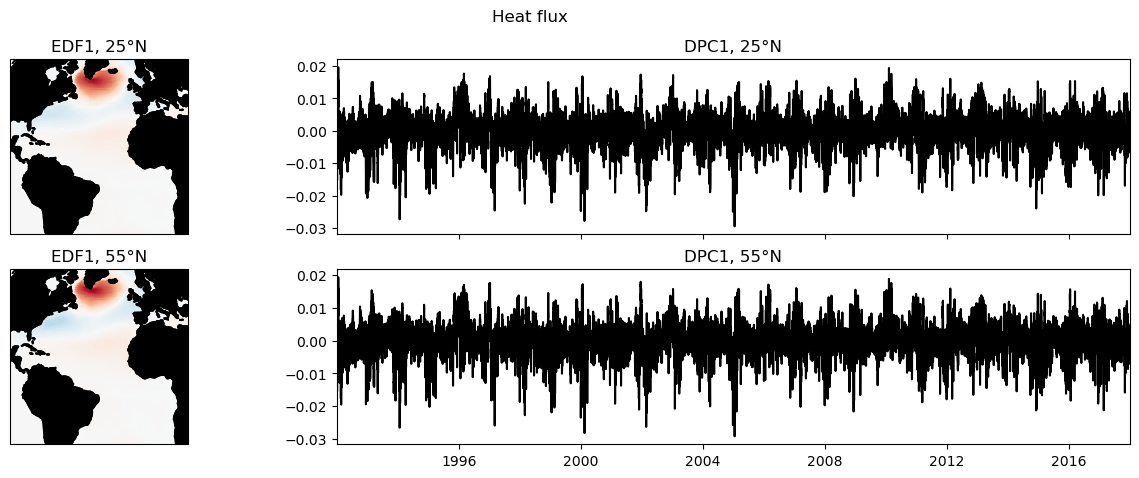

In [17]:
import matplotlib.gridspec as gridspec
import datetime as dt
t=np.arange(dt.datetime(1992,1,1,3,0,0),dt.datetime(2018,1,1,0,0,0),dt.timedelta(0.25))

fig = plt.figure()
gs = gridspec.GridSpec(nrows=2,ncols=2,width_ratios=[1,3])

ax=[]
[[ax.append(fig.add_subplot(gs[i,j])) for i in range(2)] for j in range(2)]
ax=np.array(ax).reshape(2,2).T

p,AX=unpack_and_map(EDF25_hflux.flatten()/np.linalg.norm(EDF25_hflux),ax=ax[0,0],vmin=-0.05,vmax=0.05,cmap='RdBu_r');ax[0,0]=AX
p,AX=unpack_and_map(EDF55_hflux.flatten()/np.linalg.norm(EDF55_hflux),ax=ax[1,0],vmin=-0.05,vmax=0.05,cmap='RdBu_r');ax[1,0]=AX


ax[0,1].plot(t,DPC25_hflux,'k')
# ax[1,1].plot(t,DPC35_hflux,'k')
# ax[2,1].plot(t,DPC45_hflux,'k')
ax[1,1].plot(t,DPC55_hflux,'k')
[a.set_xlim(t[0],t[-1]) for a in ax[:,1]]
[ax[i,0].set_title('EDF1, '+['25°N','55°N'][i]) for i in range(2)]
[ax[i,1].set_title('DPC1, '+['25°N','55°N'][i]) for i in range(2)]
# [ax[i,1].set_xticklabels([]) for i in range(3)]
ax[0,1].set_xticklabels([])
fig.suptitle('Heat flux')
fig.set_size_inches(15,5)

(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)


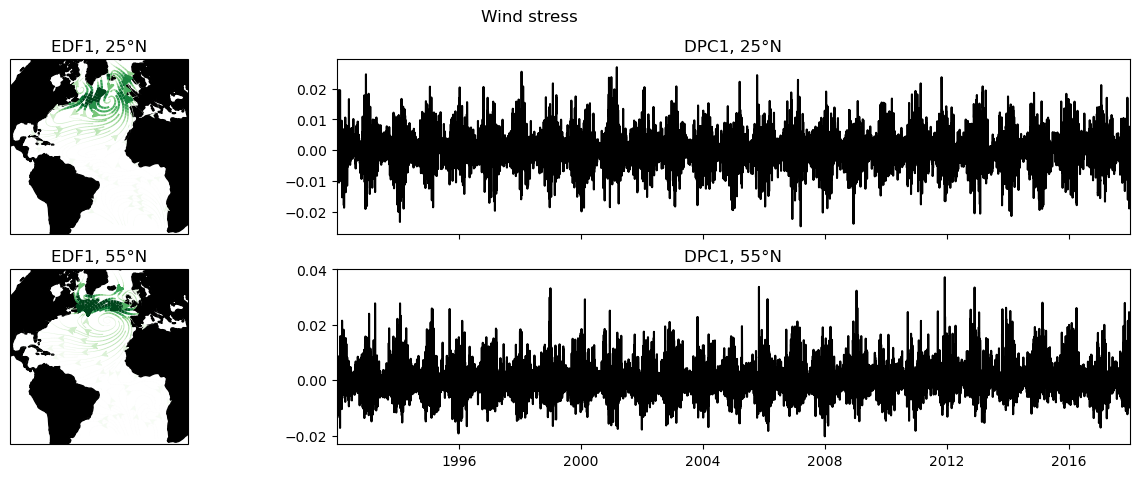

In [19]:
import matplotlib.gridspec as gridspec
import datetime as dt
t=np.arange(dt.datetime(1992,1,1,3,0,0),dt.datetime(2018,1,1,0,0,0),dt.timedelta(0.25))

fig = plt.figure()
gs = gridspec.GridSpec(nrows=2,ncols=2,width_ratios=[1,3])

ax=[]
[[ax.append(fig.add_subplot(gs[i,j])) for i in range(2)] for j in range(2)]
ax=np.array(ax).reshape(2,2).T

p,AX=atlstream(EDF25_tauxy.flatten()/np.linalg.norm(EDF25_tauxy),ax=ax[0,0],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',vmin=0,vmax=0.025,cmap='Greens');ax[0,0]=AX
p,AX=atlstream(EDF55_tauxy.flatten()/np.linalg.norm(EDF55_tauxy),ax=ax[1,0],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',vmin=0,vmax=0.025,cmap='Greens');ax[1,0]=AX

ax[0,1].plot(t,DPC25_tauxy,'k')
ax[1,1].plot(t,DPC55_tauxy,'k')
[a.set_xlim(t[0],t[-1]) for a in ax[:,1]]
[ax[i,0].set_title('EDF1, '+['25°N','55°N'][i]) for i in range(2)]
[ax[i,1].set_title('DPC1, '+['25°N','55°N'][i]) for i in range(2)]
ax[0,1].set_xticklabels([])
fig.suptitle('Wind stress')
fig.set_size_inches(15,5)
# fig.tight_layout()

# Save as npy files:

In [20]:
################# Heat flux
np.save(adjoint_output_location+'DPC55_hflux.npy',DPC55_hflux)
np.save(adjoint_output_location+'EDF55_hflux.npy',EDF55_hflux)

# np.save('DPC45_hflux.npy',DPC45_hflux)
# np.save('EDF45_hflux.npy',EDF45_hflux)

# np.save('DPC35_hflux.npy',DPC35_hflux)
# np.save('EDF35_hflux.npy',EDF35_hflux)

np.save(adjoint_output_location+'DPC25_hflux.npy',DPC25_hflux)
np.save(adjoint_output_location+'EDF25_hflux.npy',EDF25_hflux)

################## Wind stress
np.save(adjoint_output_location+'DPC55_tauxy.npy',DPC55_tauxy)
np.save(adjoint_output_location+'EDF55_tauxy.npy',EDF55_tauxy)

# np.save('DPC45_tauxy.npy',DPC45_tauxy)
# np.save('EDF45_tauxy.npy',EDF45_tauxy)

# np.save('DPC35_tauxy.npy',DPC35_tauxy)
# np.save('EDF35_tauxy.npy',EDF35_tauxy)

np.save(adjoint_output_location+'DPC25_tauxy.npy',DPC25_tauxy)
np.save(adjoint_output_location+'EDF25_tauxy.npy',EDF25_tauxy)